# Feature Selection 

## 1. Dropping constant feature
In this step we will be removing the features which have constant features which are actually not important for solving the problem statement

In [1]:
import pandas as pd

In [2]:
#creating a dataframe

data=pd.DataFrame({'A':[1,2,4,1,2,4],
                  'B':[4,5,6,7,8,9],
                  'C':[0,0,0,0,0,0],
                  'D':[1,2,3,4,1,2]})

In [3]:
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,2
2,4,6,0,3
3,1,7,0,4
4,2,8,0,1


### Variance Threshold library
Feature selector that removes all low variance feature

This feature selection algorithm looks only at the feature (X) not the desired outputs (y), and can thus be used for unsupervised learning

In [6]:
### It will remove zero variance feature
from sklearn.feature_selection import VarianceThreshold

var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [8]:
var_thres.get_support()

array([ True,  True, False,  True])

In [11]:
# Getting only the columns which is true

data.columns[var_thres.get_support()]

Index(['A', 'B', 'D'], dtype='object')

In [14]:
#Getting columns which is False

constant_col=[columns for columns in data.columns
             if columns not in data.columns[var_thres.get_support()]]

print(constant_col)

['C']


In [15]:
# droping the column which are false

data.drop(constant_col,axis=1)

,A,B,D
0,1,4,1
1,2,5,2
2,4,6,3
3,1,7,4
4,2,8,1
5,4,9,2


In [31]:
data=pd.read_csv('santander.csv', nrows=10000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [32]:
X=data.drop(labels=['TARGET'],axis=1)
y=data['TARGET']

In [33]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [34]:
X_train.shape, X_test.shape

((7000, 370), (3000, 370))

In [35]:
#### Applying the variance threshold

from sklearn.feature_selection import VarianceThreshold

thres=VarianceThreshold(threshold=0)
thres.fit(X_train)

#### here y x train...because to avoid overfitting

VarianceThreshold(threshold=0)

In [38]:
sum(thres.get_support())

284

In [ ]:
### 284 columns that has true values and 86 features are false

In [43]:
var=[columns for columns in X_train.columns
    if columns not in X_train.columns[thres.get_support()]]
print(len(var))

86


In [44]:
for columns in var:
    print(columns)

ind_var2_0
ind_var2
ind_var13_medio_0
ind_var13_medio
ind_var18_0
ind_var18
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var34_0
ind_var34
ind_var41
ind_var46_0
ind_var46
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var13_medio
saldo_var18
saldo_var28
saldo_var27
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
delta_imp_reemb_var17_1y3
delta_imp_reemb_var33_1y3
delta_imp_trasp_var17_out_1y3
delta_imp_trasp_var33_out_1y3
delta_num_reemb_var17_1y3
delta_num_reemb_var33_1y3
delta_num_trasp_var17_out_1y3
delta_num_trasp_var33_out_1y3
imp_amort_var18_hace3
imp_amort_var18_ult1
imp_amort_var34_hace3
imp_amort_var34_ult1
imp_var7_emit_ult1
imp_reemb_var13_hace3
imp_reemb_var17_hace3
imp_reemb_var17_ult1
imp_reemb_var33_hace3
imp_reemb_var33_ult1
imp_trasp_var17_in_hace3
imp_trasp_var17_out_hace3
imp_trasp_var17_out_ult1
imp_trasp_var33_i

In [45]:
X_train.drop(var,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86412.15


## 2. Feature selection with correlation

In [54]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# loading the dataset
data=fetch_california_housing()
df=pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV']=data.target

In [56]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [57]:
X=df.drop("MEDV",axis=1)
y=df['MEDV']

In [58]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [60]:
# train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

In [62]:
X_train.shape,X_test.shape

((14448, 8), (6192, 8))

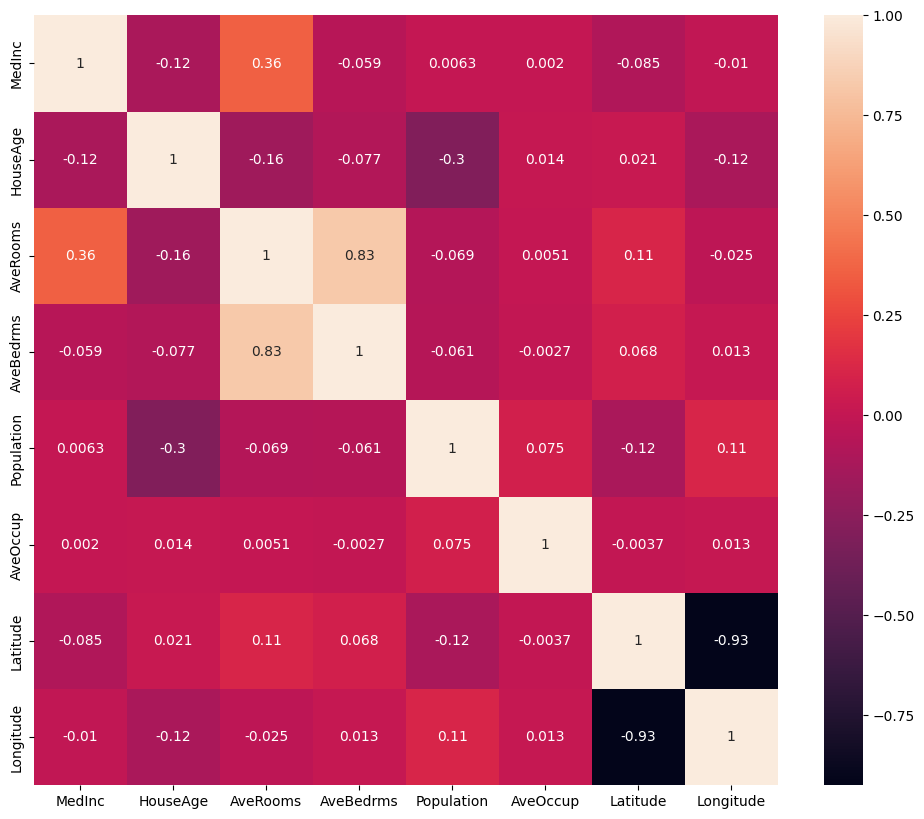

In [67]:
# using heatmap

import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(data=X_train.corr(), annot=True)
plt.show()

In [105]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr=set() # set is used to store unique elements
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:   # we are interested in absolute coeff value....using abs depends
                colname = corr_matrix.columns[i]      #getting the name of the column
                col_corr.add(colname)
    return col_corr

In [107]:
corr_features=correlation(X_train, 0.75)
set(corr_features)

{'AveBedrms'}

In [109]:
X_train.drop(corr_features, axis=1)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
1989,1.9750,52.0,2.800000,193.0,4.825000,36.73,-119.79
256,2.2604,43.0,3.671480,836.0,3.018051,37.77,-122.21
7887,6.2990,17.0,6.478022,1387.0,3.810440,33.87,-118.04
4581,1.7199,17.0,2.518000,3051.0,3.051000,34.06,-118.28
1993,2.2206,50.0,4.622754,606.0,3.628743,36.73,-119.81
...,...,...,...,...,...,...,...
13123,4.4125,20.0,6.000000,712.0,3.251142,38.27,-121.26
19648,2.9135,27.0,5.349282,647.0,3.095694,37.48,-120.89
9845,3.1977,31.0,3.641221,704.0,1.791349,36.58,-121.90
10799,5.6315,34.0,4.540598,1052.0,2.247863,33.62,-117.93


# Information gain - mutual information in clssification problem statement

#### Mutual information

MI Estimate mutual for a discrete target variable

Mutual information (MI) between two random variable is a non negative value which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

<b>I(X ; Y) = H(X) – H(X | Y)<b>
Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [110]:
# reading dataset

df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [123]:
### train test split
### to avoid oversplitting

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'],axis=1),df['Wine'],test_size=0.3, random_state=0)

In [124]:
X_train.shape,X_test.shape

((124, 13), (54, 13))

In [125]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information

mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([0.41439057, 0.29532504, 0.16994182, 0.26496532, 0.19579302,
       0.48407449, 0.71718694, 0.12701405, 0.25908224, 0.61595218,
       0.55686128, 0.54747574, 0.54142105])

In [126]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.717187
Color.int               0.615952
Hue                     0.556861
OD                      0.547476
Proline                 0.541421
Phenols                 0.484074
Alcohol                 0.414391
Malic.acid              0.295325
Acl                     0.264965
Proanth                 0.259082
Mg                      0.195793
Ash                     0.169942
Nonflavanoid.phenols    0.127014
dtype: float64

<AxesSubplot:>

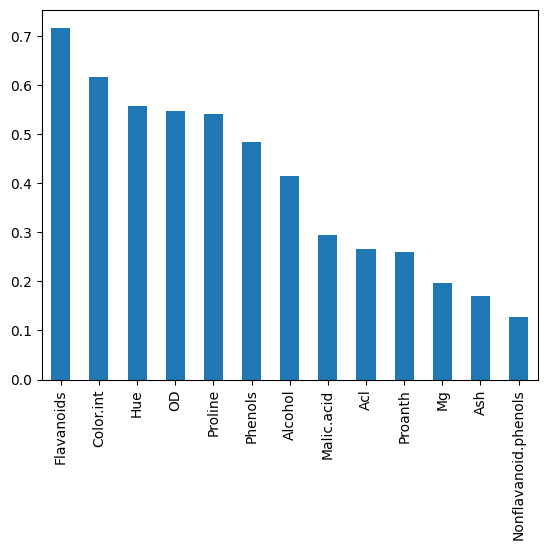

In [127]:
#l ets plot the mutual info values per feature

mutual_info.sort_values(ascending=False).plot.bar()

In [134]:
from sklearn.feature_selection import SelectKBest

# we will select the top 5 important features

sel_col=SelectKBest(mutual_info_classif,k=5)
sel_col.fit(X_train,y_train)
X_train.columns[sel_col.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

#### Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y)
and
IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for 
information gain. Technically, they calculate the same quantity
if applied to the same data.

## mutual information in clssification problem statement

In [136]:
# reading the dataset

df=pd.read_csv('House price.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [139]:
# since there are many object i need perform feature eng
# so i will select only int category

In [142]:
num_list=['int16','int32','int64','float16','float32','float64']
num_col= list(df.select_dtypes(include=num_list).columns)

In [144]:
num_col

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [145]:
df=df[num_col]

In [146]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [147]:
df=df.drop(labels=['Id'],axis=1)

In [155]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['SalePrice'],axis=1),df['SalePrice'],test_size=0.3,random_state=0)

In [156]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,NaN,9375,7,5,1997,1998,573.0,739,0,...,645,576,36,0,0,0,0,0,2,2009
682,120,NaN,2887,6,5,1996,1997,0.0,1003,0,...,431,307,0,0,0,0,0,0,11,2008
960,20,50.0,7207,5,7,1958,2008,0.0,696,0,...,0,117,0,0,0,0,0,0,2,2010
1384,50,60.0,9060,6,5,1939,1950,0.0,204,0,...,280,0,0,0,0,0,0,0,10,2009
1100,30,60.0,8400,2,5,1920,1950,0.0,290,0,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,82.0,9430,8,5,1999,1999,673.0,1163,0,...,856,0,128,0,0,180,0,0,7,2009
835,20,60.0,9600,4,7,1950,1995,0.0,442,0,...,436,290,0,0,0,0,0,0,2,2010
1216,90,68.0,8930,6,5,1978,1978,0.0,0,0,...,539,0,0,0,0,0,0,0,4,2010
559,120,NaN,3196,7,5,2003,2004,18.0,0,0,...,420,143,20,0,0,0,0,0,10,2006


In [157]:
X_train=X_train.fillna(0)
X_train.isnull().sum()


MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [158]:
from sklearn.feature_selection import mutual_info_regression
mutual=mutual_info_regression(X_train,y_train)
mutual

array([0.25714621, 0.20495356, 0.16532561, 0.53134309, 0.09587809,
       0.3514129 , 0.24506565, 0.0936671 , 0.15329576, 0.        ,
       0.11339081, 0.38387484, 0.31226642, 0.23595207, 0.        ,
       0.48108106, 0.01585237, 0.        , 0.26568155, 0.08600575,
       0.04052967, 0.02586559, 0.18632087, 0.17665368, 0.26972164,
       0.36767295, 0.36790822, 0.08061347, 0.17421949, 0.01046788,
       0.01405231, 0.02755486, 0.01723671, 0.        , 0.        ,
       0.00912069])

In [160]:
mutual=pd.Series(mutual)
mutual.index=X_train.columns
mutual.sort_values(ascending=False)

OverallQual      0.531343
GrLivArea        0.481081
TotalBsmtSF      0.383875
GarageArea       0.367908
GarageCars       0.367673
YearBuilt        0.351413
1stFlrSF         0.312266
GarageYrBlt      0.269722
FullBath         0.265682
MSSubClass       0.257146
YearRemodAdd     0.245066
2ndFlrSF         0.235952
LotFrontage      0.204954
TotRmsAbvGrd     0.186321
Fireplaces       0.176654
OpenPorchSF      0.174219
LotArea          0.165326
BsmtFinSF1       0.153296
BsmtUnfSF        0.113391
OverallCond      0.095878
MasVnrArea       0.093667
HalfBath         0.086006
WoodDeckSF       0.080613
BedroomAbvGr     0.040530
ScreenPorch      0.027555
KitchenAbvGr     0.025866
PoolArea         0.017237
BsmtFullBath     0.015852
3SsnPorch        0.014052
EnclosedPorch    0.010468
YrSold           0.009121
BsmtFinSF2       0.000000
BsmtHalfBath     0.000000
LowQualFinSF     0.000000
MiscVal          0.000000
MoSold           0.000000
dtype: float64

<AxesSubplot:>

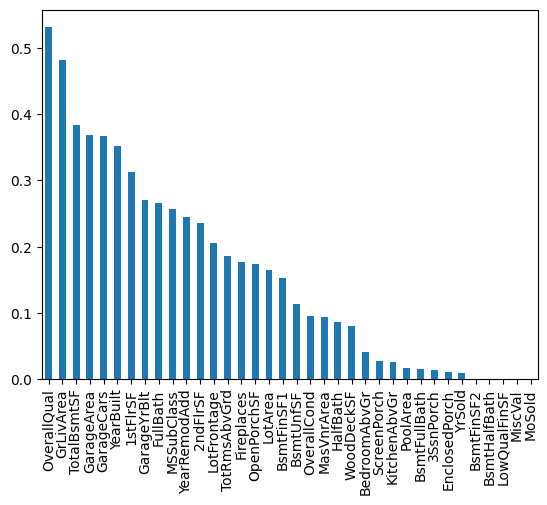

In [161]:
mutual.sort_values(ascending=False).plot.bar()

In [172]:
from sklearn.feature_selection import SelectPercentile

slt=SelectPercentile(mutual_info_regression,percentile=30)
slt.fit(X_train,y_train)
X_train.columns[slt.get_support()]

Index(['MSSubClass', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageYrBlt', 'GarageCars',
       'GarageArea'],
      dtype='object')

## Chisquare test for feature selection

Compute chi-squared stats between each non-negative feature and target feature.

- This score should be used to evaluate categorical variables in a classification task.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.
The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [225]:
# importing the dataset
import seaborn as sns
df=sns.load_dataset('titanic')

In [226]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [228]:
### ['Sex','emabarked','alone','pclss','Survived']

df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [229]:
## lets perform label encoding on sex

df['sex']=np.where(df['sex']=='male',1,0)

## perform label encoding on embarked

ordinal={k:i for i,k in enumerate(df['embarked'].unique(),0)}
df['embarked']=df['embarked'].map(ordinal)

## perform label encoding on embarked
df['alone']=np.where(df['alone']==False,0,1)

In [230]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [231]:
df.sex.unique()

array([1, 0])

In [232]:
## train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['survived'],axis=1),df['survived'],test_size=0.3,random_state=100)

In [233]:
## perform chi2 test
## chi2 returens 2 values
## Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_value=chi2(X_train,y_train)
f_p_value

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

In [234]:
## here the first row is f-score and second is pvalue
## f-score need to be higher
## lesser the p value the more important the feature is

In [235]:
pvalues=pd.Series(f_p_value[1])
pvalues.index=X_train.columns
pvalues

sex         5.306038e-16
embarked    5.999221e-03
alone       9.696105e-04
pclass      2.755149e-06
dtype: float64

In [236]:
pvalues.sort_index(ascending=False)

sex         5.306038e-16
pclass      2.755149e-06
embarked    5.999221e-03
alone       9.696105e-04
dtype: float64

In [ ]:
### observation
sex column is the most important column when compared to the output feature survived

## Univariet Selection

In [2]:
#importing the dataset

import pandas as pd
df=pd.read_csv('mobile.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
#splitting dependent and independent

X=df.iloc[:,:-1]
y=df['price_range']

In [7]:
from sklearn.feature_selection import SelectKBest   #for selecting the number of rows from specific rows...i.e, i want 10 rows from 100
from sklearn.feature_selection import chi2

In [9]:
### Apply SelectKbest algorithm

ordered_features=SelectKBest(chi2,k=20)
ordered_features.fit(X,y)


SelectKBest(k=20, score_func=<function chi2 at 0x000002A1226F9240>)

In [10]:
ordered_features.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [12]:
data=pd.DataFrame(ordered_features.scores_).rename(columns={0:'Scores'})

In [13]:
data

,Scores
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


In [14]:
data.index=X.columns

In [19]:
data=data.reset_index().rename(columns={'index':'features'})
data.head()

,features,Scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166


In [21]:
#Based on scores im taking top 10 in descending 

data.nlargest(10,'Scores')

,features,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


## Feature Importance
more people use

this technique gives you a score for each feature of your data, the higher the score more relevant it is

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
tree=ExtraTreesClassifier()
tree.fit(X,y)

ExtraTreesClassifier()

In [25]:
print(tree.feature_importances_)

[0.0612807  0.02077691 0.03372453 0.01992826 0.03359805 0.01716232
 0.03594956 0.03399674 0.03742466 0.03383792 0.03402125 0.04676508
 0.04838621 0.3852978  0.03520853 0.03444951 0.03547995 0.01419468
 0.018444   0.02007333]


In [29]:
data=pd.Series(tree.feature_importances_)

In [30]:
data.index=X.columns

In [31]:
data

battery_power    0.061281
blue             0.020777
clock_speed      0.033725
dual_sim         0.019928
fc               0.033598
four_g           0.017162
int_memory       0.035950
m_dep            0.033997
mobile_wt        0.037425
n_cores          0.033838
pc               0.034021
px_height        0.046765
px_width         0.048386
ram              0.385298
sc_h             0.035209
sc_w             0.034450
talk_time        0.035480
three_g          0.014195
touch_screen     0.018444
wifi             0.020073
dtype: float64

NameError: name 'plt' is not defined

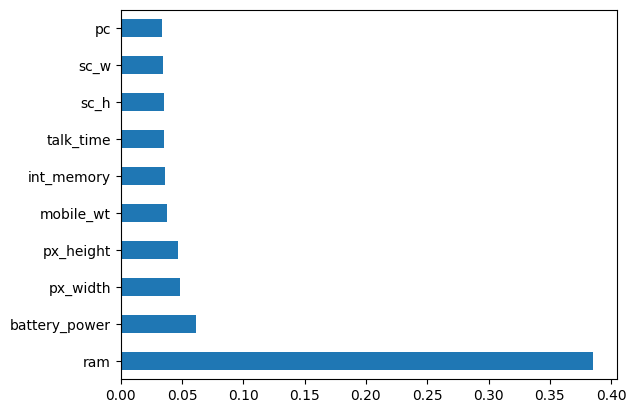

In [32]:
data.nlargest(10).plot(kind='barh')
plt.show